#Prediksi Potensi Kebangkrutan Bank Menggunakan Algoritma Random Forest

### Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier




In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
)
import joblib  # untuk menyimpan model


In [4]:
pd.set_option('display.max_columns', None)

### Load Dataset

In [5]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
path = '/content/drive/MyDrive/Colab Notebooks/data-bank.csv'
data = pd.read_csv(path)

print("Dataset berhasil dimuat!")
data.head()

Dataset berhasil dimuat!


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

### Data Understanding (EDA)

In [7]:
# Info umum dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [8]:
# Cek missing values
print("\nMissing Values per kolom:\n", data.isnull().sum())



Missing Values per kolom:
 Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64



Distribusi target variable:
Bankrupt?
0    6599
1     220
Name: count, dtype: int64


/tmp/ipython-input-1259074542.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Bankrupt?', palette='Set2')


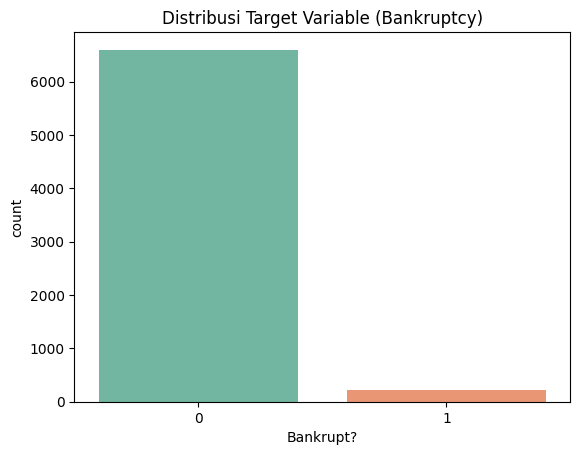

In [9]:
print("\nDistribusi target variable:")
print(data['Bankrupt?'].value_counts())

sns.countplot(data=data, x='Bankrupt?', palette='Set2')
plt.title("Distribusi Target Variable (Bankruptcy)")
plt.show()

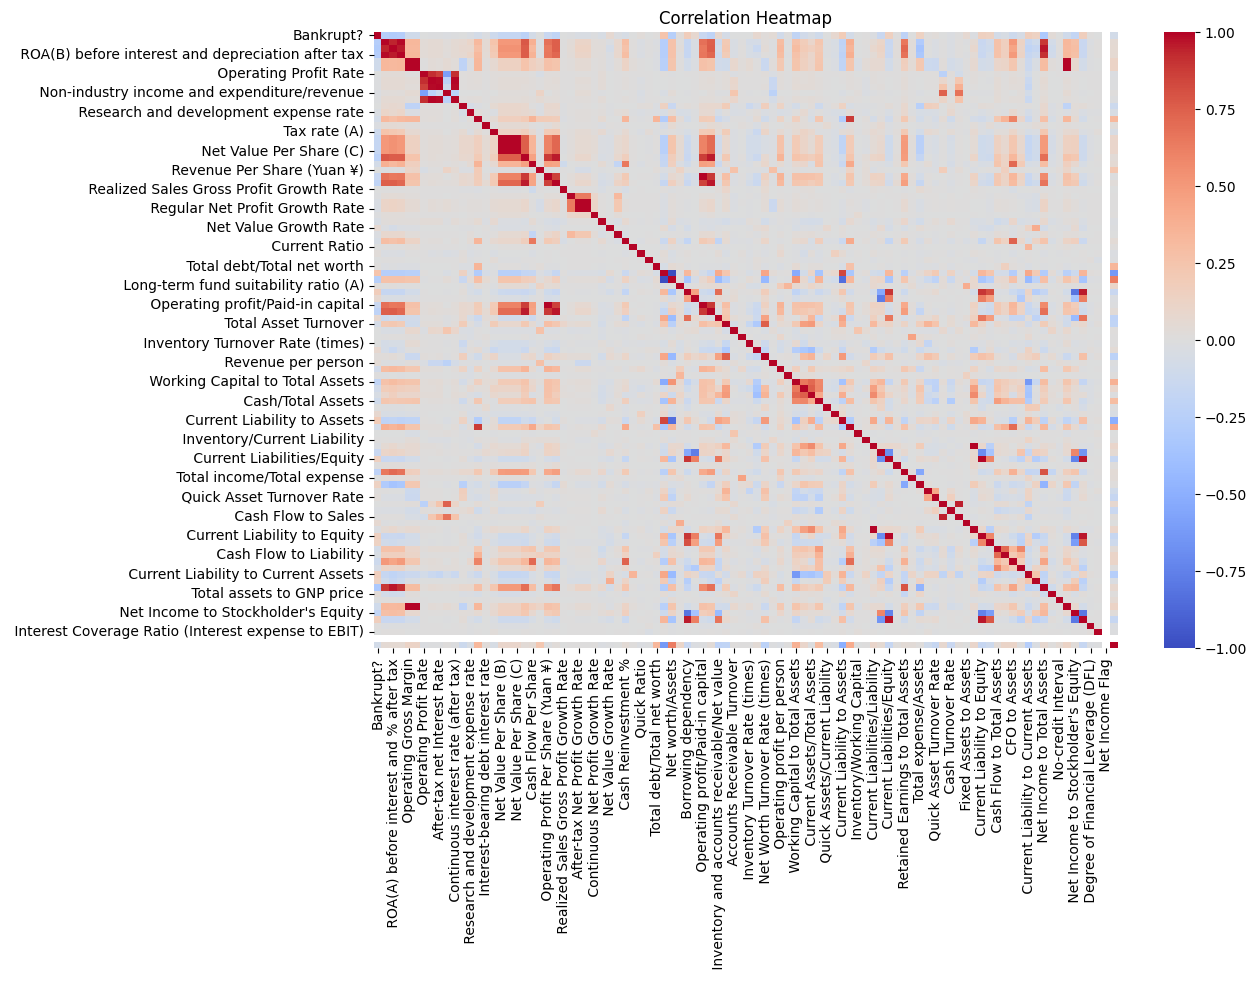

In [10]:
# Korelasi antar variabel numerik
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Data Cleaning & Preparation

In [11]:
# Drop baris/kolom jika ada missing values (opsional)
data = data.dropna()

In [12]:
# Pisahkan fitur dan target
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']

# Cek apakah dataset imbalance
print("\nJumlah data per kelas:")
print(y.value_counts(normalize=True))


Jumlah data per kelas:
Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


In [13]:
# Normalisasi/Scaling fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train-Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Data training:", X_train.shape)
print("Data testing:", X_test.shape)

Data training: (5455, 95)
Data testing: (1364, 95)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit scaler hanya pada data training
X_train_scaled = scaler.fit_transform(X_train)

# Transform data testing (jangan fit!)
X_test_scaled = scaler.transform(X_test)

print("Scaling selesai. X_train_scaled dan X_test_scaled siap untuk ANN.")

Scaling selesai. X_train_scaled dan X_test_scaled siap untuk ANN.


### Modeling (Random Forest)

In [16]:
rf = RandomForestClassifier(
    n_estimators=200,          # jumlah pohon
    max_depth=None,           # biar pohon tumbuh optimal
    random_state=42,
    class_weight='balanced'   # penting untuk dataset imbalance
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [17]:
# Prediksi
y_pred = rf.predict(X_test)

### Evaluation (Random Forest)

In [18]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.9699413489736071

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.62      0.18      0.28        44

    accuracy                           0.97      1364
   macro avg       0.79      0.59      0.63      1364
weighted avg       0.96      0.97      0.96      1364



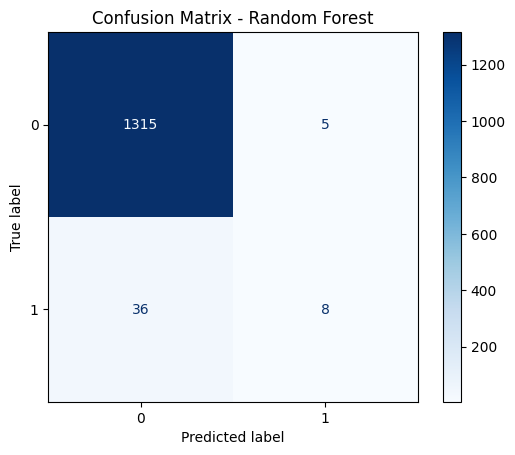

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

### Modelling (Decision Tree)

In [21]:
# ============================================
# Decision Tree Model
# ============================================

dt = DecisionTreeClassifier(
    criterion='gini',      # default
    max_depth=None,        # biarkan pohon tumbuh bebas dulu
    random_state=42,
    class_weight='balanced'  # penting untuk dataset imbalanced
)

dt.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt.predict(X_test)


### Evaluation (Decision Tree)

=== Decision Tree Evaluation ===
Accuracy: 0.9523460410557185

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1320
           1       0.27      0.27      0.27        44

    accuracy                           0.95      1364
   macro avg       0.62      0.62      0.62      1364
weighted avg       0.95      0.95      0.95      1364



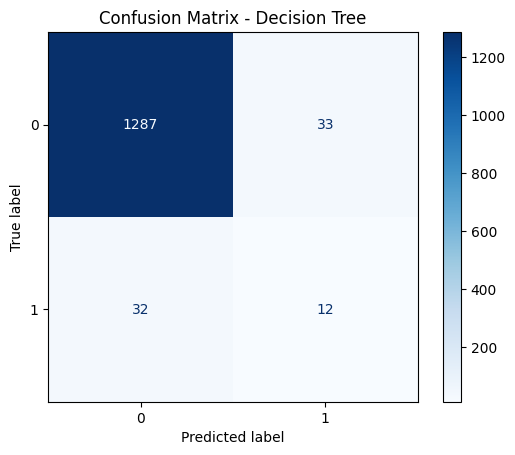

In [22]:
# ============================================
# Evaluation Decision Tree
# ============================================

print("=== Decision Tree Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt).plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


### Modelling (ANN)

In [23]:
# ============================================
# Artificial Neural Network (ANN) Model
# ============================================

ann = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # 2 hidden layers: 64 neuron & 32 neuron
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

ann.fit(X_train, y_train)

# Prediksi
y_pred_ann = ann.predict(X_test)


### Evaluation (ANN)

=== Artificial Neural Network (ANN) Evaluation ===
Accuracy: 0.9582111436950147

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1320
           1       0.30      0.23      0.26        44

    accuracy                           0.96      1364
   macro avg       0.64      0.60      0.62      1364
weighted avg       0.95      0.96      0.96      1364



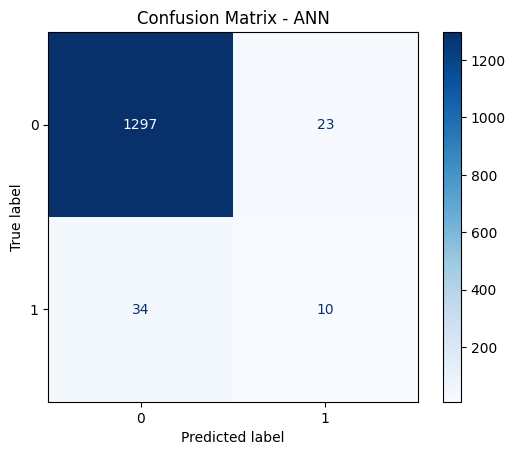

In [24]:
# ============================================
# Evaluation ANN
# ============================================

print("=== Artificial Neural Network (ANN) Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_ann))

# Confusion Matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)
ConfusionMatrixDisplay(cm_ann).plot(cmap='Blues')
plt.title("Confusion Matrix - ANN")
plt.show()


###Feature Importance


Top 5 Fitur Paling Berpengaruh:
                                     Feature  Importance
39                      Borrowing dependency    0.057454
85                Net Income to Total Assets    0.045287
18   Persistent EPS in the Last Four Seasons    0.042961
94                       Equity to Liability    0.037174
37                          Net worth/Assets    0.035560


/tmp/ipython-input-1117206856.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances.head(10), x='Importance', y='Feature', palette='viridis')


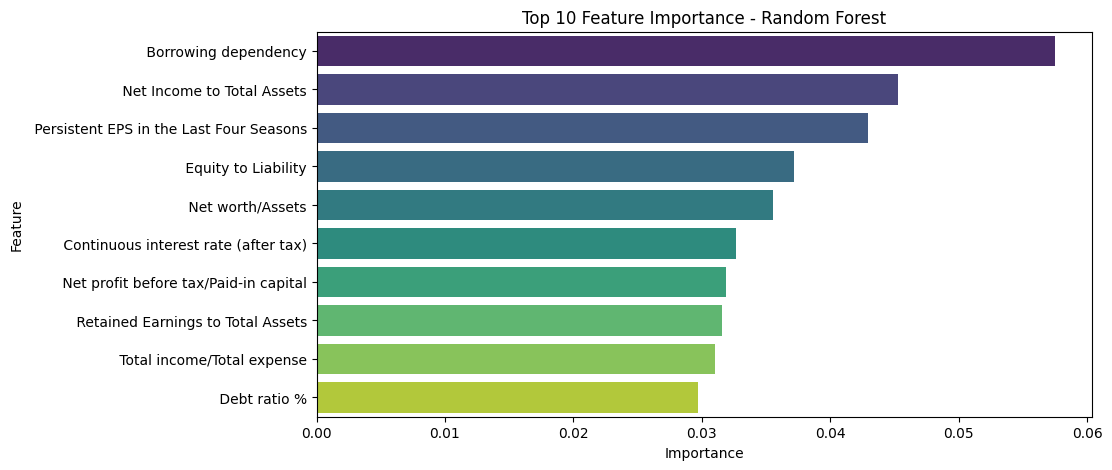

In [20]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 5 Fitur Paling Berpengaruh:")
print(importances.head(5))

plt.figure(figsize=(10,5))
sns.barplot(data=importances.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importance - Random Forest")
plt.show()